# **W6W7W8 Python TL Simulation**

# **Data Overview**

There are 4 data that we used in this TL Simulation :
1. [Users](https://docs.google.com/spreadsheets/d/1dV7Xunv6KI7Kbr0nP1ffn7I_mIms2-9LDCjryNHqWDE/edit#gid=0)
2. [Transactions](https://docs.google.com/spreadsheets/d/1FOvLKlf4tOP8iN8jwahxGFUCYxB2XFB0Ba-1AWhTkig/edit#gid=0)  
3. [Transactions Item](https://docs.google.com/spreadsheets/d/1gLBNZtMWm1pITCk_YI4cZn0PZzrr0ZnYYfqOsM_7wR0/edit#gid=0)
4. [Payment Method](https://docs.google.com/spreadsheets/d/1fJ4nuarwyHYaPpkTPrpol3OYlHRrTzdUdwOMvl57CO4/edit#gid=0)

# **Import Library**

In [ ]:
import pandas as pd                 # lib used to perform data frame manipulation and advaced analysis
import numpy as np                  # lib used for working with arrays
import matplotlib.pyplot as plt     # lib for creating static, animated, and interactive visualizations
import seaborn as sns               # lib that provides a high-level interface for drawing attractive and informative statistical graphics
from google.colab import data_table
data_table.enable_dataframe_formatter()

# **Load Dataset**

## **I. Users Dataset**

**DATA DICTIONARY - Users Dataset**
*   **user_id** : unique identifier of the user
*   **register_date** : user register date for the first time
*   **name** : name of user
*   **gender** : gender of user
*   **province** : user's province location
*   **city** : user's city location

In [ ]:
# Input Users Dataset Url
user_url = 'https://docs.google.com/spreadsheets/d/1dV7Xunv6KI7Kbr0nP1ffn7I_mIms2-9LDCjryNHqWDE/edit#gid=0'
user_url_trf = user_url.replace('/edit#gid=', '/export?format=csv&gid=')

# Load Users Dataset
df_user = pd.read_csv(user_url_trf)

# To get the Users Dataset Info
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        1727 non-null   int64 
 1   register_date  1721 non-null   object
 2   name           1722 non-null   object
 3   gender         1721 non-null   object
 4   province       1727 non-null   object
 5   city           1727 non-null   object
dtypes: int64(1), object(5)
memory usage: 81.1+ KB


In [ ]:
df_user

,user_id,register_date,name,gender,province,city
0,10000,1/16/2020,Warta Pradipta,male,DKI Jakarta,Jakarta Utara
1,10001,3/10/2018,Jaya Mahendra S.Ked,male,Jawa Timur,Surabaya
2,10002,7/6/2018,Balidin Sitorus,male,DKI Jakarta,South Jakarta
3,10003,11/19/2018,Cemani Narpati,male,Banten,Tangerang Selatan
4,10004,3/19/2021,Daniswara Tarihoran S.Sos,male,Jawa Tengah,Semarang
...,...,...,...,...,...,...
1722,20951,NaN,Dian Mayasari,female,DKI Jakarta,Jakarta Barat
1723,20952,NaN,Uli Rahimah,female,Banten,Tangerang Selatan
1724,20953,NaN,Titi Laksmiwati,female,Jawa Timur,surabaya
1725,20954,7/23/2019,Najwa Haryanti,female,Jawa Barat,Kota Bogor


    From the informationa above, we can draw several points :
      1. Users Dataset consist of 6 columns & 1727 rows
      2. There are 2 data type that do not match (user_id & register_date)

## **II. Transactions Dataset**

**DATA DICTIONARY - Transactions Dataset**
*   **event_name** : reference to the order status (Completed or Cancelled)
*   **transaction_date** : date of user doing transaction
*   **user_id** : unique identifier of user
*   **payment_method_id** : unique id of payment method
*   **transaction_id** : unique id of transaction

In [ ]:
# Input Transactions Dataset Url
trx_url = 'https://docs.google.com/spreadsheets/d/1FOvLKlf4tOP8iN8jwahxGFUCYxB2XFB0Ba-1AWhTkig/edit#gid=0'
trx_url_trf = trx_url.replace('/edit#gid=', '/export?format=csv&gid=')

# Load Transactions Dataset
df_trx = pd.read_csv(trx_url_trf)

# To get the Transaction Dataset Info
df_trx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   event_name         10480 non-null  object 
 1   transaction-date   10512 non-null  object 
 2   user_id            10527 non-null  object 
 3   payment_method_id  10529 non-null  float64
 4   transaction_id     10526 non-null  float64
dtypes: float64(2), object(3)
memory usage: 411.5+ KB


    From the informationa above, we can draw several points :
      1. Transactions Dataset consist of 5 columns & 10532 rows
      2. There are 3 data types that do not match (transaction_date, payment_method_id, transaction_id)

## **III. Transactions Item Dataset**

**DATA DICTIONARY - Transactions Item Dataset**
*   **transaction_item_id** : unique id of transaction item
*   **transaction_id** : unique id of transaction
*   **Event_name** : reference to the order status (Completed or Cancelled)
*   **product_id** : unique id of product
*   **qty** : quantity of order per product
*   **price** : product price
*   **total_amount** : total order amount

In [ ]:
# Input Trasactions Item Dataset Url
txi_url = 'https://docs.google.com/spreadsheets/d/1gLBNZtMWm1pITCk_YI4cZn0PZzrr0ZnYYfqOsM_7wR0/edit#gid=0'
txi_url_trf = txi_url.replace('/edit#gid=', '/export?format=csv&gid=')

# Load Transactions Item Dataset
df_txi = pd.read_csv(txi_url_trf)

# To get the Transactions Item Dataset Info
df_txi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15822 entries, 0 to 15821
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   transaction_item_id  15822 non-null  int64 
 1   transaction_id       15822 non-null  int64 
 2   Event_name           15822 non-null  object
 3   product_id           15822 non-null  int64 
 4   qty                  15822 non-null  int64 
 5   price                15822 non-null  int64 
 6   total_amount         15822 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 865.4+ KB


    From the informationa above, we can draw several points :
      1. Transactions Item Dataset consist of 7 columns & 15882 rows
      2. There are 3 data types that do not match (transaction_item_id,  transaction_id, product_id)

## **IV. Payment Method Dataset**

**DATA DICTIONARY - Payment Method Dataset**
*   **payment_id** : unique id of payment method
*   **payment_method** : type of payment

In [ ]:
# Input Payment Method Dataset Url
pm_url = 'https://docs.google.com/spreadsheets/d/1fJ4nuarwyHYaPpkTPrpol3OYlHRrTzdUdwOMvl57CO4/edit#gid=0'
pm_url_trf = pm_url.replace('/edit#gid=', '/export?format=csv&gid=')

# Load Payment Method Dataset
df_pm = pd.read_csv(pm_url_trf)

# To get the Payment Method Dataset Info
df_pm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   payment_id      5 non-null      int64 
 1   payment_method  5 non-null      object
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


    From the informationa above, we can draw several points :
      1. Order Dataset consist of 2 columns & 5 rows
      2. There is 1 data type that do not match (payment_id)

# **Data Cleaning**

## **I. Removing Irrelevant Values**

**I. Transactions Dataset**

In the analysis we are doing today, it is only done on transactions that have already been completed. So, we're going to delete for the 'cancelled' event.

In [ ]:
# To see all order status
df_trx['event_name'].value_counts()

Completed    9541
Cancelled     939
Name: event_name, dtype: int64

      Becasue 'Cancelled' <10%, I choose to remove "Cancelled' and drop event_name column because there is only 1 type of status.

In [ ]:
# create filter to keep 'Completed' order status
f_complete = df_trx['event_name'] == 'Completed'

# remove all data except 'Completed' order status
df_trx = df_trx.loc[f_complete]

# drop order_status column
# df_trx.drop(columns = 'event_name', inplace = True)

In [ ]:
df_trx.drop(columns = 'event_name').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9541 entries, 0 to 10531
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction-date   9541 non-null   object 
 1   user_id            9539 non-null   object 
 2   payment_method_id  9538 non-null   float64
 3   transaction_id     9539 non-null   float64
dtypes: float64(2), object(2)
memory usage: 372.7+ KB


In [ ]:
df_trx.info()

**II. Transaction Items Dataset**

In the analysis we are doing today, it is only done on transactions that have already been completed. So, we're going to delete for the 'cancelled' event.

In [ ]:
# to see each event name and its counts
df_txi['Event_name'].value_counts()

Completed    14295
Cancelled     1527
Name: Event_name, dtype: int64

      Becasue 'Cancelled' <10%, I choose to remove "Cancelled' and drop Event_name column because there is only 1 type of status.

In [ ]:
# create filter to keep 'Completed' order status
f_complete = df_txi['Event_name'] == 'Completed'

# remove all data except 'Completed' order status
df_txi = df_txi.loc[f_complete]

# drop order_status column
df_txi.drop(columns = 'Event_name', inplace = True)

## **II. Handling Missing Values**

**i. Users Dataset**

In [ ]:
# to check missing values
df_user.isna().sum()

user_id          0
register_date    6
name             5
gender           6
province         0
city             0
dtype: int64

      Because we cannot fill the Null data in register_date, name and gender, i choose to drop the null value

In [ ]:
# to drop the NaN data
df_user.dropna(inplace = True)

In [ ]:
df_user.isna().sum()

user_id          0
register_date    0
name             0
gender           0
province         0
city             0
dtype: int64

      There is no missing values left.

**ii. Transactions Dataset**

In [ ]:
# to check missing values
df_trx.isna().sum()

transaction-date     0
user_id              2
payment_method_id    3
transaction_id       2
dtype: int64

      Because we cannot fill the Null data in user_id, payment_method_id and transaction_id, i choose to drop the null value

In [ ]:
# to drop the NaN data
df_trx.dropna(inplace = True)

In [ ]:
# to check missing values
df_trx.isna().sum()

transaction-date     0
user_id              0
payment_method_id    0
transaction_id       0
dtype: int64

      There is no missing values left.

**iii. Transactions Item Dataset**

There is no missing values in Transactions Item Dataset

In [ ]:
# to check missing values
df_txi.isna().sum()

transaction_item_id    0
transaction_id         0
product_id             0
qty                    0
price                  0
total_amount           0
dtype: int64

**iv. Payment Method**

There is no missing values in Payment Method Dataset

In [ ]:
# to check missing values
df_pm.isna().sum()

payment_id        0
payment_method    0
dtype: int64

## **III. Remove Duplicate Values**

**i. Users Dataset**

In [ ]:
# to check duplicated data
df_user.duplicated().sum()

16

    There are 16 duplicated datas. So we need to remove them.

In [ ]:
df_user.duplicated

<bound method DataFrame.duplicated of       user_id register_date                          name  gender  \
0       10000     1/16/2020                Warta Pradipta    male   
1       10001     3/10/2018           Jaya Mahendra S.Ked    male   
2       10002      7/6/2018               Balidin Sitorus    male   
3       10003    11/19/2018                Cemani Narpati    male   
4       10004     3/19/2021     Daniswara Tarihoran S.Sos    male   
...       ...           ...                           ...     ...   
1716    10148      3/5/2019      Asirwanda Heryanto Uwais    male   
1717    10149     2/18/2018     Agus Maras Saputra M.Farm    male   
1718    10150     3/12/2019  Margana Lembah Saragih S.Kom    male   
1725    20954     7/23/2019                Najwa Haryanti  female   
1726    20955     1/14/2019                 Gasti Zulaika  female   

         province               city  
0     DKI Jakarta      Jakarta Utara  
1      Jawa Timur           Surabaya  
2     DKI Jakart

In [ ]:
# to drop dulicated data
df_user.drop_duplicates(inplace = True)

# to check duplicated data
df_user.duplicated().sum()

0

    There is no more duplicated data

**ii. Transactions Dataset**

In [ ]:
# to check duplicated data
df_trx.duplicated().sum()

14

    There are 16 duplicated datas. So we need to remove them.

In [ ]:
# to drop dulicated data
df_trx.drop_duplicates(inplace = True)

# to check duplicated data
df_trx.duplicated().sum()

0

    There is no more duplicated data

**iii. Transactions Item Dataset**

There is no duplicated values.

In [ ]:
# to check duplicated data
df_txi.duplicated().sum()

0

**iv. Payment Method Dataset**

There is no duplicated values.

In [ ]:
# to check duplicated data
df_pm.duplicated().sum()

0

## **IV. Convert Data Types**

**i. Users Dataset**

We will change register_date to datetime

In [ ]:
# To get the dataset Info
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1694 entries, 0 to 1710
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        1694 non-null   int64 
 1   register_date  1694 non-null   object
 2   name           1694 non-null   object
 3   gender         1694 non-null   object
 4   province       1694 non-null   object
 5   city           1694 non-null   object
dtypes: int64(1), object(5)
memory usage: 92.6+ KB


In [ ]:
# Convert data type from data frame

# Convert user_id from Int to Sting
df_user['user_id'] = df_user['user_id'].astype(str)

 # Convert register_date data types to datetime
df_user['register_date'] = pd.to_datetime(df_user['register_date'])

df_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1694 entries, 0 to 1710
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        1694 non-null   object        
 1   register_date  1694 non-null   datetime64[ns]
 2   name           1694 non-null   object        
 3   gender         1694 non-null   object        
 4   province       1694 non-null   object        
 5   city           1694 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 92.6+ KB


In [ ]:
df_user.head()

,user_id,register_date,name,gender,province,city
0,10000,2020-01-16,Warta Pradipta,male,DKI Jakarta,Jakarta Utara
1,10001,2018-03-10,Jaya Mahendra S.Ked,male,Jawa Timur,Surabaya
2,10002,2018-07-06,Balidin Sitorus,male,DKI Jakarta,South Jakarta
3,10003,2018-11-19,Cemani Narpati,male,Banten,Tangerang Selatan
4,10004,2021-03-19,Daniswara Tarihoran S.Sos,male,Jawa Tengah,Semarang


**ii. Transactions Dataset**

We will change transaction_date to datetime

In [ ]:
# To get the dataset Info
df_trx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9520 entries, 0 to 10502
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction-date   9520 non-null   object 
 1   user_id            9520 non-null   object 
 2   payment_method_id  9520 non-null   float64
 3   transaction_id     9520 non-null   float64
dtypes: float64(2), object(2)
memory usage: 371.9+ KB


In [ ]:
# Convert data type from data frame

# Convert transaction-date data type into datetime
df_trx['transaction-date'] = pd.to_datetime(df_trx['transaction-date'], errors='coerce')

# Convert payment_method_id and transaction_id into string
into_str = ['transaction_id', 'payment_method_id']
df_trx[into_str] = df_trx[into_str].astype(str)

df_trx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9520 entries, 0 to 10502
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction-date   9517 non-null   datetime64[ns]
 1   user_id            9520 non-null   object        
 2   payment_method_id  9520 non-null   object        
 3   transaction_id     9520 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 371.9+ KB


In [ ]:
df_trx.isna().sum()

transaction-date     3
user_id              0
payment_method_id    0
transaction_id       0
dtype: int64

In [ ]:
# to drop the NaN data
df_trx.dropna(inplace = True)

df_trx.isna().sum()

transaction-date     0
user_id              0
payment_method_id    0
transaction_id       0
dtype: int64

**iii. Transactions Item Dataset**

In [ ]:
# To get the dataset Info
df_txi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14295 entries, 0 to 15413
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   transaction_item_id  14295 non-null  int64
 1   transaction_id       14295 non-null  int64
 2   product_id           14295 non-null  int64
 3   qty                  14295 non-null  int64
 4   price                14295 non-null  int64
 5   total_amount         14295 non-null  int64
dtypes: int64(6)
memory usage: 781.8 KB


In [ ]:
# we change transaction_item_id, product_id, and transaction_id from Int to String
df_txi['transaction_item_id'] = df_txi['transaction_item_id'].astype(str)
df_txi['product_id'] = df_txi['product_id'].astype(str)
df_txi['transaction_id'] = df_txi['transaction_id'].astype(str)

**iv. Payment Method Dataset**

In [ ]:
# To get the dataset Info
df_pm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   payment_id      5 non-null      int64 
 1   payment_method  5 non-null      object
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


In [ ]:
# we change payment_id data type from Int into String
df_pm['payment_id'] = df_pm['payment_id'].astype(str)

## **V. String Manipulation**

**i. User Dataset**

In [ ]:
df_user['province'].value_counts()

DKI Jakarta    729
Jawa Barat     402
Banten         225
Jawa Timur     224
Jawa Tengah    114
Name: province, dtype: int64

In [ ]:
# to see each city name and its counts
df_user['city'].value_counts()

Kota Depok           123
Jakarta Pusat        116
Semarang             114
surabaya             114
Kota Tangerang       113
Tangerang Selatan    112
Jakarta Utara        111
Surabaya             110
Jakarta Barat        106
South Jakarta        102
Kota Bekasi          102
Jakarta Selatan      101
Central Jakarta       98
Jakarta Timur         95
Bandung               92
Kota Bogor            85
Name: city, dtype: int64

    there is a typo and also the same value in different languages, so we will equate the data.
    surabaya --> Surabaya
    Central Jakarta --> Jakarta Pusat
    South Jakarta --> Jakarta Selatan

In [ ]:
# to replace string into new values
df_user['city'] = df_user['city'].str.replace('surabaya','Surabaya')
df_user['city'] = df_user['city'].str.replace('South Jakarta','Jakarta Selatan')
df_user['city'] = df_user['city'].str.replace('Central Jakarta','Jakarta Pusat')

# to see the data after we manipulate
df_user['city'].value_counts()

Surabaya             224
Jakarta Pusat        214
Jakarta Selatan      203
Kota Depok           123
Semarang             114
Kota Tangerang       113
Tangerang Selatan    112
Jakarta Utara        111
Jakarta Barat        106
Kota Bekasi          102
Jakarta Timur         95
Bandung               92
Kota Bogor            85
Name: city, dtype: int64

**ii. Transactions Dataset**

In [ ]:
df_pm['payment_id']

0    1
1    2
2    3
3    4
4    5
Name: payment_id, dtype: object

In [ ]:
df_trx['payment_method_id']

0        3.0
1        3.0
2        4.0
3        3.0
4        5.0
        ... 
10488    4.0
10489    1.0
10490    4.0
10491    5.0
10492    2.0
Name: payment_method_id, Length: 9517, dtype: object

In [ ]:
# we split payment_method_id and transaction_id and take the 1st index (0)
df_trx['payment_method_id'] = df_trx['payment_method_id'].str.split('.', expand = True)[0]
df_trx['transaction_id'] = df_trx['transaction_id'].str.split('.', expand = True)[0]

## **VI. Combine Datast**

In [ ]:
# we merge all dataset into new dataset. we used PK and FK to join the data
df = df_trx.merge(df_user, how = 'inner', on = 'user_id')\
              .merge(df_txi, how = 'inner', on = 'transaction_id')\
              .merge(df_pm, how = 'inner', left_on = 'payment_method_id', right_on = 'payment_id' )
df

,transaction-date,user_id,payment_method_id,transaction_id,register_date,name,gender,province,city,transaction_item_id,product_id,qty,price,total_amount,payment_id,payment_method
0,2020-01-01 06:29:14,20926,3,201289,2021-04-10,Ayu Maryati,female,Jawa Barat,Kota Depok,2012891,30007,1,1590000,1590000,3,transfer
1,2020-01-01 06:29:14,20926,3,201289,2021-04-10,Ayu Maryati,female,Jawa Barat,Kota Depok,2012892,30006,1,1470000,1470000,3,transfer
2,2020-05-01 20:05:49,20926,3,202216,2021-04-10,Ayu Maryati,female,Jawa Barat,Kota Depok,2022161,30019,1,1360000,1360000,3,transfer
3,2020-05-01 20:05:49,20926,3,202216,2021-04-10,Ayu Maryati,female,Jawa Barat,Kota Depok,2022162,30004,1,1020000,1020000,3,transfer
4,2021-01-13 16:40:10,20926,3,303568,2021-04-10,Ayu Maryati,female,Jawa Barat,Kota Depok,3035681,30046,1,1290000,1290000,3,transfer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14054,2021-10-04 08:34:04,20323,1,306489,2019-05-18,Raisa Ida Wijayanti M.Ak,female,DKI Jakarta,Jakarta Selatan,3064891,10002,1,200000,200000,1,credit card
14055,2021-10-13 22:40:31,10015,1,306528,2018-02-01,Mulya Imam Sitorus,male,DKI Jakarta,Jakarta Utara,3065281,10023,1,35000,35000,1,credit card
14056,2021-10-19 10:07:21,10301,1,306552,2019-05-20,Ozy Viman Ramadan M.Kom.,male,DKI Jakarta,Jakarta Utara,3065521,10022,1,20000,20000,1,credit card
14057,2021-11-15 06:35:33,10227,1,306644,2020-03-01,Margana Taufik Budiyanto S.H.,male,Jawa Timur,Surabaya,3066441,10024,1,15000,15000,1,credit card


In [ ]:
# to get the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14059 entries, 0 to 14058
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   transaction-date     14059 non-null  datetime64[ns]
 1   user_id              14059 non-null  object        
 2   payment_method_id    14059 non-null  object        
 3   transaction_id       14059 non-null  object        
 4   register_date        14059 non-null  datetime64[ns]
 5   name                 14059 non-null  object        
 6   gender               14059 non-null  object        
 7   province             14059 non-null  object        
 8   city                 14059 non-null  object        
 9   transaction_item_id  14059 non-null  object        
 10  product_id           14059 non-null  object        
 11  qty                  14059 non-null  int64         
 12  price                14059 non-null  int64         
 13  total_amount         14059 non-

## **VII. Transform Data**

In this part, we transform our data into unique per transaction id.

In [ ]:
# create new dataframe that have the accumulated value per transactions
df_new = df.copy()
df_new = df_new.groupby('transaction_id')['qty','total_amount'].sum()
df_new

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,qty,total_amount
transaction_id,,
201001,2,330000
201002,2,350000
201003,2,200000
201004,2,400000
201005,2,175000
...,...,...
307805,1,1010000
307807,1,1700000
307808,1,1300000


In [ ]:
# drop columns where the column explained order per items
list_drop = ['qty','price','total_amount','transaction_item_id','product_id']
df.drop(columns = list_drop, inplace = True)

# merge the data
df = pd.merge(df, df_new, how = 'inner', on = 'transaction_id')

In [ ]:
# we see the duplicated data
df.duplicated().sum()

4678

In [ ]:
# drop duplicated data
df.drop_duplicates(inplace = True)

# to check duplicated data
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9381 entries, 0 to 14058
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction-date   9381 non-null   datetime64[ns]
 1   user_id            9381 non-null   object        
 2   payment_method_id  9381 non-null   object        
 3   transaction_id     9381 non-null   object        
 4   register_date      9381 non-null   datetime64[ns]
 5   name               9381 non-null   object        
 6   gender             9381 non-null   object        
 7   province           9381 non-null   object        
 8   city               9381 non-null   object        
 9   payment_id         9381 non-null   object        
 10  payment_method     9381 non-null   object        
 11  qty                9381 non-null   int64         
 12  total_amount       9381 non-null   int64         
dtypes: datetime64[ns](2), int64(2), object(9)
memory usage: 1.0+ M

# **Descriptive Statistics**

## **Numerical**

In [ ]:
# we create new dataset that contaions only numerical value
descstat = df.describe()                        # to seet the descriptive statistics for each variable
col_desc = ['qty','total_amount']       # we determine the numerical column name for further needs
descstat.loc['skewness'] = df[col_desc].skew()  # to get the skewness value
descstat.loc['variance'] = df[col_desc].var()   # to get the kurtosis value

In [ ]:
pd.set_option('display.float_format',  '{:,}'.format) # set the display of numbers so that they are not abbreviated
descstat = round(descstat,2)                          # set the display of numbers to be rounded to 2 digits after the comma
descstat

,qty,total_amount
count,"9,381.0","9,381.0"
mean,1.58,"1,396,241.13"
std,0.6,"1,019,280.24"
min,1.0,"15,000.0"
25%,1.0,"650,000.0"
50%,2.0,"1,320,000.0"
75%,2.0,"2,040,000.0"
max,4.0,"6,820,000.0"
skewness,0.54,0.73
variance,0.36,"1,038,932,215,685.9"


**Summary**
1. There are 9381 rows of recorded data
2. The minimum quantity is 1, the maximum is 4 and the average is 1.58.
4. The minimum total amount is 15k, the maximum is 6.82M and the average is 1.4M
5. From Skewness, we can say that  total_amount  and quantity are highly skewed


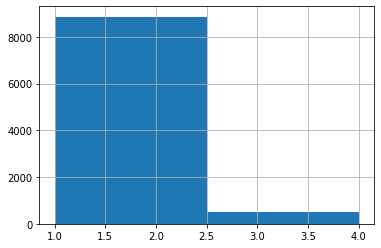

In [ ]:
# to see the distribution of qty data
df['qty'].hist(bins = 2)

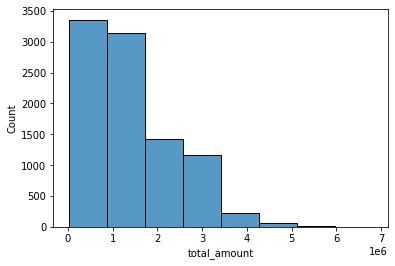

In [ ]:
# to see the distribution of total_amount data
sns.histplot(data=df, x='total_amount',bins=8)

## **Categorical**

In [ ]:
df.describe(exclude = np.number) # to see the descriptive statistics for non-numerical column

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,transaction-date,user_id,payment_method_id,transaction_id,register_date,name,gender,province,city,payment_id,payment_method
count,9381,9381,9381,9381,9381,9381,9381,9381,9381,9381,9381
unique,9380,1574,5,9381,947,1571,2,5,13,5,5
top,2020-12-21 13:09:47,20854,5,201289,2020-11-04 00:00:00,Suci Winarsih,female,DKI Jakarta,Jakarta Pusat,5,paylater
freq,2,34,3235,1,68,34,5651,4035,1223,3235,3235
first,2020-01-01 06:29:14,NaN,NaN,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-12-30 21:45:34,NaN,NaN,NaN,2021-12-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


    we can see the number of unique data from each column, the number of data, the mode and the frequency of the data mode

**Summary**

- There are 8278 women from all data (59.9%)
- Transactions made from 2020-01-01 to 2021-12-31
- User registers from 2018-01-01 to 2021-12-28
- There are 1571 user in this data

# **Exploratory Data Analysis**

## **Num of Transaction per Month**

In [ ]:
# make a dataframe copy
EDA_1 = df.copy()

# extract MonthYear of time purchased
EDA_1['MonthYear'] = EDA_1['transaction-date'].dt.strftime('%Y-%m-01').astype('datetime64')
EDA_1.head()

# create new data frame to get the number of order
EDA_1 = EDA_1.groupby('MonthYear')['transaction_id'].agg('nunique').reset_index()
EDA_1.columns = ['Month Year','Total Order']
EDA_1

,Month Year,Total Order
0,2020-01-01,211
1,2020-02-01,226
2,2020-03-01,234
3,2020-04-01,286
4,2020-05-01,255
5,2020-06-01,268
6,2020-07-01,421
7,2020-08-01,419
8,2020-09-01,398
9,2020-10-01,659


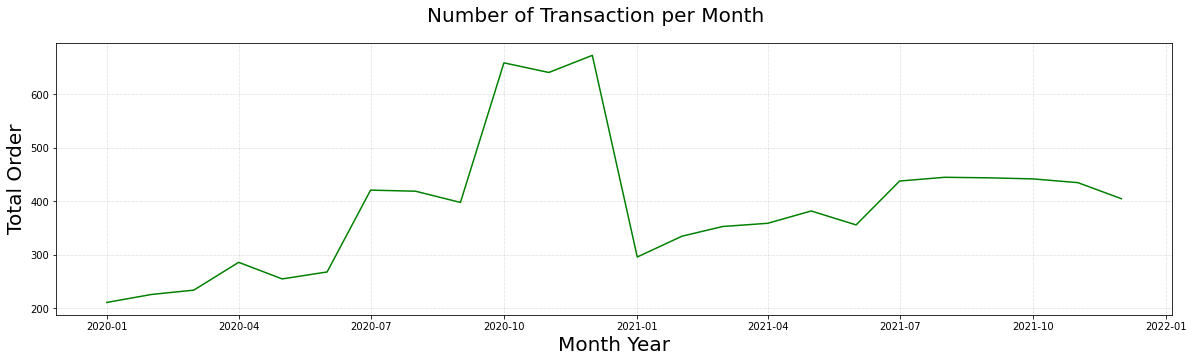

In [ ]:
# create the visualization of the data
fig = plt.figure(figsize=(20, 5)) #to set the figure size

fig.suptitle('Number of Transaction per Month', fontsize=20) # to set the chart title and its font size
plt.xlabel('Month Year', fontsize=20) # to set the axis title and its font size
plt.ylabel('Total Order', fontsize=20)  # to set the axis title and its font size

x = EDA_1['Month Year'] # load the data to be used for that axis
y = EDA_1['Total Order'] # load the data to be used for that axis

plt.plot(x, y, color = 'green') # to plot and select the line colour
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.show() # to show the chart

    Summary
      - The highest order was in Dec 2020 with 673 orders.
      - The lowest order was in Jan 2020 with 211 order only.
      - During the pandemic, customers prefer to buy through online stores, and it is estimated that sales in October to December 2020 due to the pandemic and high sales at the end of the year can be expected due to Christmas and New Year discounts.

## **Spending Habit between Gender**

In [ ]:
# make a dataframe copy
EDA_2 = df.copy()

# extract Day and Date from the data
EDA_2['Day'] = EDA_2['transaction-date'].dt.day_name()
EDA_2['Date'] = EDA_2['transaction-date'].dt.strftime('%Y-%m-%d').astype('datetime64')
EDA_2['days'] = EDA_2['Date'].dt.strftime('%w')

# create new dataframe to get the trend
EDA_2 = EDA_2.groupby(['Day','days','gender'])['transaction_id'].agg('nunique').reset_index()
EDA_2.columns = ['Day','days','Gender','Total Order']
EDA_2.sort_values(by='days',ascending=True,inplace=True)
EDA_2

,Day,days,Gender,Total Order
6,Sunday,0,female,818
7,Sunday,0,male,534
2,Monday,1,female,802
3,Monday,1,male,512
10,Tuesday,2,female,835
11,Tuesday,2,male,510
12,Wednesday,3,female,821
13,Wednesday,3,male,515
8,Thursday,4,female,809
9,Thursday,4,male,558


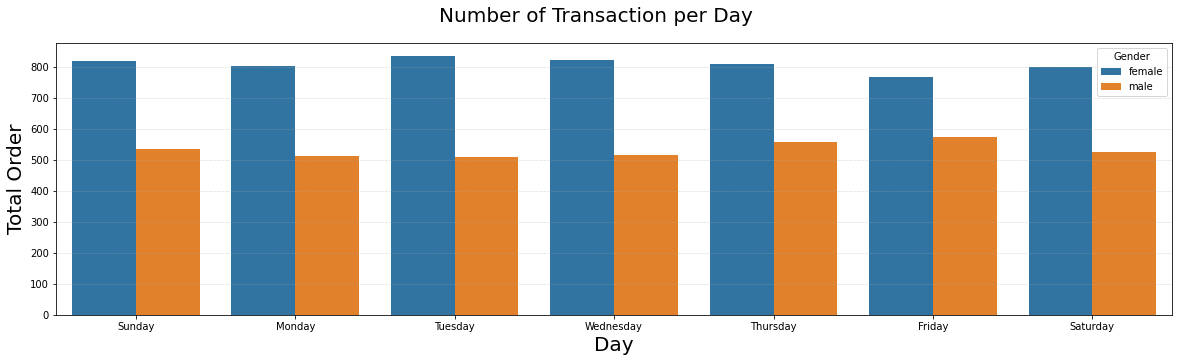

In [ ]:
fig = plt.figure(figsize=(20, 5))

fig.suptitle('Number of Transaction per Day', fontsize=20)
plt.xlabel('Day', fontsize=20)
plt.ylabel('Total Order', fontsize=20)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)

sns.barplot(data=EDA_2, x="Day", y="Total Order", hue="Gender")
plt.show()

    Summary
      - Female customers make more transactions than Male customers.

## **Monthly Trend of Transaction Amount**

In [ ]:
# make a dataframe copy
EDA_3 = df.copy()

# extract MonthYear of time purchased
EDA_3['MonthYear'] = EDA_3['transaction-date'].dt.strftime('%Y-%m-01').astype('datetime64')
EDA_3.head()

# create new data frame to get the number of order
EDA_3 = EDA_3.groupby('MonthYear')['total_amount'].agg('sum').reset_index()
EDA_3.columns = ['Month Year','Transaction Amount']
EDA_3

,Month Year,Transaction Amount
0,2020-01-01,417924400
1,2020-02-01,447088200
2,2020-03-01,487518800
3,2020-04-01,583529800
4,2020-05-01,522331000
5,2020-06-01,530393200
6,2020-07-01,413254800
7,2020-08-01,435062200
8,2020-09-01,391120400
9,2020-10-01,1226745800


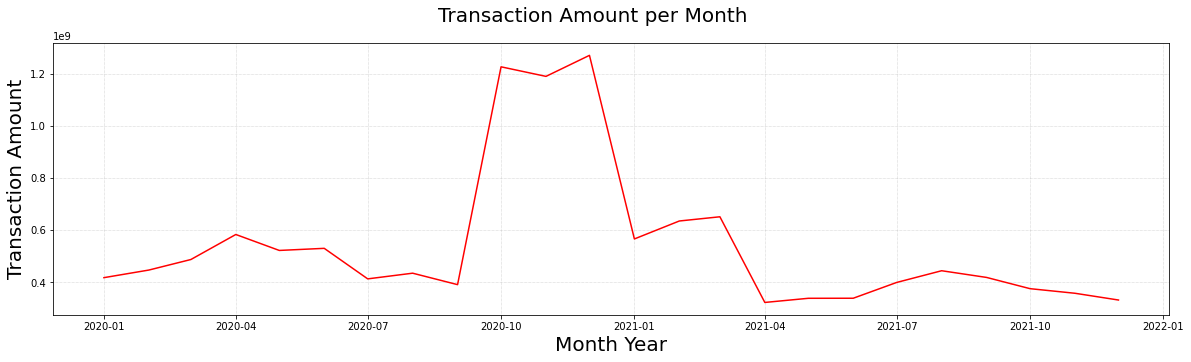

In [ ]:
# create the visualization of the data
fig = plt.figure(figsize=(20, 5))

fig.suptitle('Transaction Amount per Month', fontsize=20)
plt.xlabel('Month Year', fontsize=20)
plt.ylabel('Transaction Amount', fontsize=20)

x = EDA_3['Month Year']
y = EDA_3['Transaction Amount']
mean = y.mean()

plt.plot(x, y, color = 'red')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.show()

    Summary    
      - Since the pandemic began to spread in early 2020, many customers have not made transactions because customers are still making savings due to the pandemic.
      - However, at the end of 2020, there were many transactions made by customers. This can be due to the Christmas and New Year discounts and also the high purchasing power of customers due to savings since the pandemic spread.

## **%Users based on Gender**

In [ ]:
# make a dataframe copy
EDA_4 = df.copy()

# create new data frame
EDA_4 = EDA_4.groupby('gender')['user_id'].agg('nunique').reset_index()
EDA_4.columns = ['Gender','Num of User']
EDA_4

,Gender,Num of User
0,female,928
1,male,646


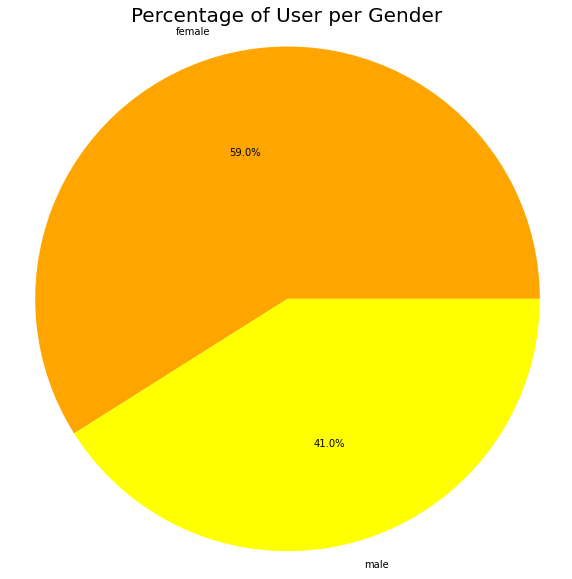

In [ ]:
plt.figure(figsize=(10, 10))

data = EDA_4['Num of User']
labels = EDA_4['Gender']

plt.pie(data,labels=labels,autopct='%1.1f%%',colors=('orange','yellow'))
plt.title('Percentage of User per Gender', fontsize=20)
plt.axis('equal')
plt.show()

    Summary
    - 59,0 % Female Customers
    - 41,0 % Male Customers

## **%Payment Methods based on Gender**

In [ ]:
# make a dataframe copy
EDA_5 = df.copy()

In [ ]:
# create new series
EDA_5a = EDA_5.groupby('gender')['transaction_id'].agg('nunique')
EDA_5a

gender
female    5651
male      3730
Name: transaction_id, dtype: int64

In [ ]:
# create new series
EDA_5b = EDA_5.groupby(['gender','payment_method'])['transaction_id'].agg('nunique')
EDA_5b

gender  payment_method
female  credit card        361
        debit card         900
        e-wallet          1260
        paylater          1969
        transfer          1161
male    credit card        270
        debit card         589
        e-wallet           870
        paylater          1266
        transfer           735
Name: transaction_id, dtype: int64

<Figure size 432x288 with 0 Axes>

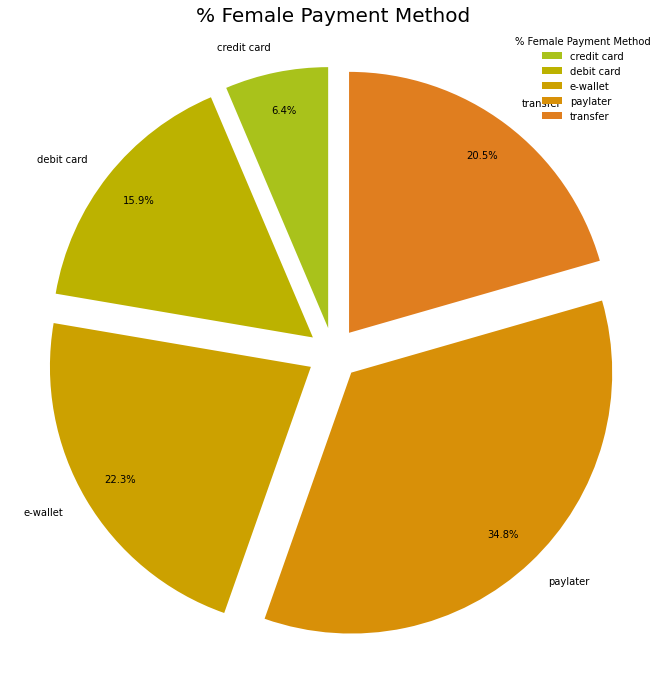

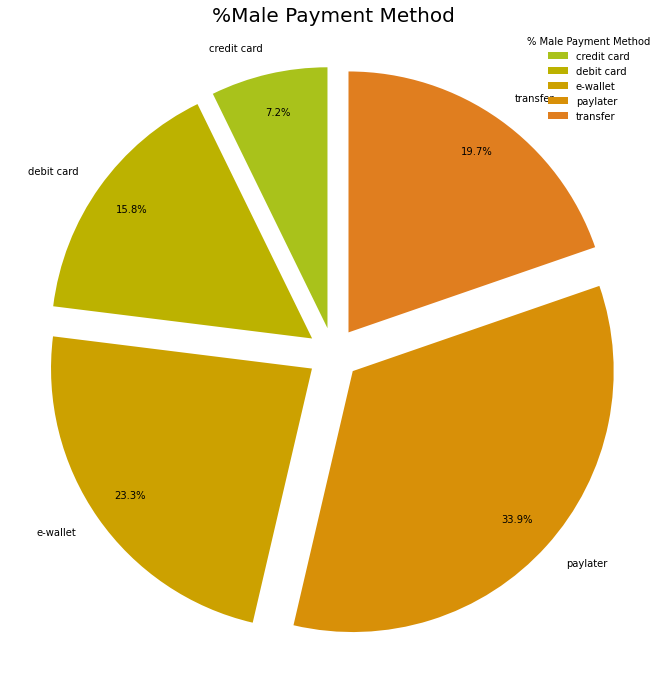

In [ ]:
# Group the data based on gender & payment method
EDA5 = EDA_5.groupby(['gender','payment_method'])['transaction_id'].agg('nunique').reset_index()

# Divide into genders
EDA5_female = EDA5.loc[EDA5['gender'] == 'female']
EDA5_male =  EDA5.loc[EDA5['gender'] == 'male']

#Data to Plot
f_label = EDA5_female['payment_method'].to_list()
f_size = EDA5_female['transaction_id'].to_list()
m_label = EDA5_male['payment_method'].to_list()
m_size = EDA5_male['transaction_id'].to_list()

colors = ['#a9c21b','#bcb200','#cca100','#d89008','#e07e1f']
explode = (0.1,0.1,0.1,0.1,0.1)

# Plot - Female
plt.figure(0)
plt.figure(figsize=(12, 12))
plt.pie(f_size, colors = colors, labels=f_label, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
plt.title('% Female Payment Method', fontsize=20)
plt.legend(loc = 'upper right', frameon =False, title = '% Female Payment Method')

# Plot - Male
plt.figure(1)
plt.figure(figsize=(12, 12))
plt.pie(m_size, colors = colors, labels=m_label, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
plt.title('%Male Payment Method', fontsize=20)
plt.legend(loc = 'upper right', frameon =False, title = '% Male Payment Method')

# To Show the Plots
plt.show()

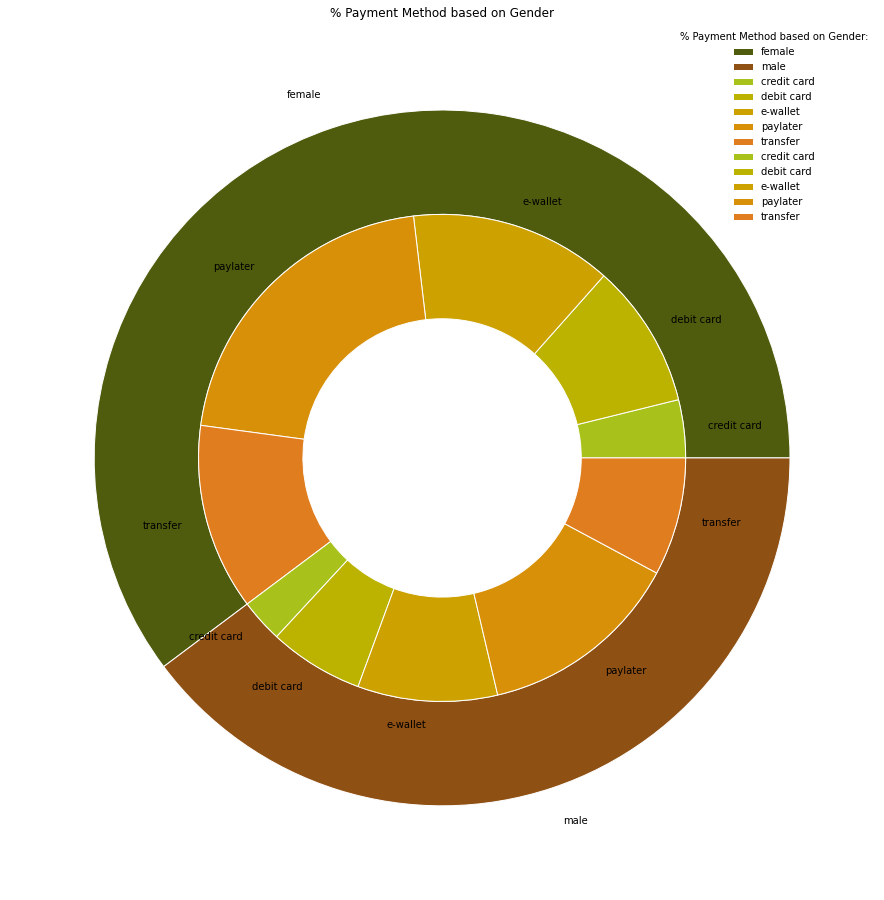

In [ ]:
fig, ax = plt.subplots(figsize=(16,16))
size = 0.3

outer_labels = EDA_5a.index
inner_labels = EDA_5b.index.get_level_values(1)

outer_colors = ['#505c0d','#8f5014']
inner_colors = ['#a9c21b','#bcb200','#cca100','#d89008','#e07e1f']

ax.pie(EDA_5a.values.flatten(), radius=1,
       labels = outer_labels,
       colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(EDA_5b.values.flatten(), radius=1-size,
       labels = inner_labels,
       colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='% Payment Method based on Gender')
plt.legend(loc = 'upper right', frameon =False, title = '% Payment Method based on Gender:')
plt.show()

    Summary
    - both genders prefer to use paylater payment methods over others

# **Customer Segmentation**

# **Data Preparation**

## **Import Library**

In [ ]:
from sklearn.preprocessing import MinMaxScaler  # Transform features by scaling each feature to a given range
from sklearn.preprocessing import StandardScaler# Transform features by scaling each feature to a given range
from sklearn.preprocessing import RobustScaler  # Transform features by scaling each feature to a given range
from sklearn import cluster                     # library that contains algorithms for segmenting
from silhoutte import silhoutte_analysis        # used to study the separation distance between the resulting clusters

## **Data Pre-Processing**

In [ ]:
# make a dataframe copy
base = df.copy()

In [ ]:
# drop columns that we dont need in cluster analysis
# determine unused column
drop_col = ['transaction-date','register_date',
            'name','gender','province','city','payment_id']

# drop unused column
base.drop(columns = drop_col, inplace = True)

In [ ]:
# We Group the data to see unique user characteristics (number of transactions and the amount)
customer = base.groupby('user_id').agg({'transaction_id': 'nunique',
                                  'total_amount' : 'sum'}).reset_index()
customer.columns = ['user_id','num_tx','total_amount']
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1574 entries, 0 to 1573
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       1574 non-null   object
 1   num_tx        1574 non-null   int64 
 2   total_amount  1574 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 37.0+ KB


In [ ]:
customer.head()

,user_id,num_tx,total_amount
0,10000,1,95000
1,10001,3,410000
2,10002,4,780000
3,10003,1,115000
4,10004,2,505000


## **Detect Outlier**

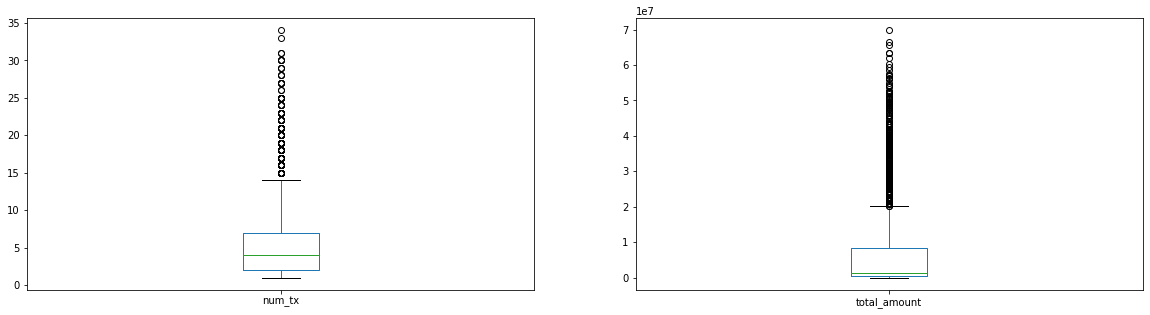

In [ ]:
# filter numeric column
col_list = ['num_tx','total_amount']

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,5))

# for 0 (i) , Income (el)
for i,el in enumerate(col_list):
    a = customer.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1574 entries, 0 to 1573
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       1574 non-null   object
 1   num_tx        1574 non-null   int64 
 2   total_amount  1574 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 37.0+ KB


## **Check Data Distribution**

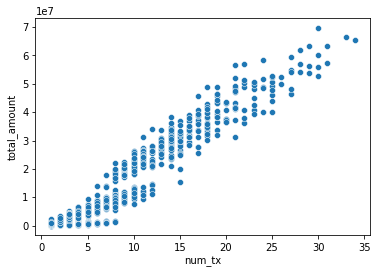

In [ ]:
# raw data without scaling
raw_scatter = sns.scatterplot(data = customer, x = 'num_tx', y = 'total_amount')

In [ ]:
# we use RobustScaler because we have outliers in our daa=ta
scaler = RobustScaler()

# create new dataframe where we apply RobustScaler into our raw Data
robust_df = customer.copy()
robust_df[col_list] = scaler.fit_transform(robust_df[col_list])

# check the data
robust_df

,user_id,num_tx,total_amount
0,10000,-0.6,-0.15565667660442492
1,10001,-0.2,-0.11611485956378471
2,10002,0.0,-0.06966891573827083
3,10003,-0.6,-0.15314608504628904
4,10004,-0.4,-0.10418954966263926
...,...,...,...
1569,20988,2.8,4.3249207594539465
1570,20989,1.4,2.556660913227679
1571,20990,1.8,3.3670798681939433
1572,20997,1.2,2.822783618390083


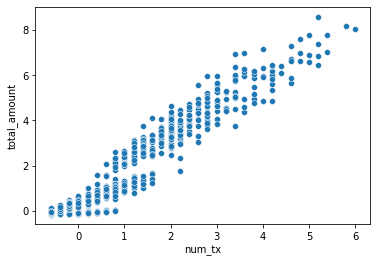

In [ ]:
# visualize scaled data
robust_scatter = sns.scatterplot(data = robust_df, x = 'num_tx', y = 'total_amount')

# **Clustering Process**

## **Elbow Method**

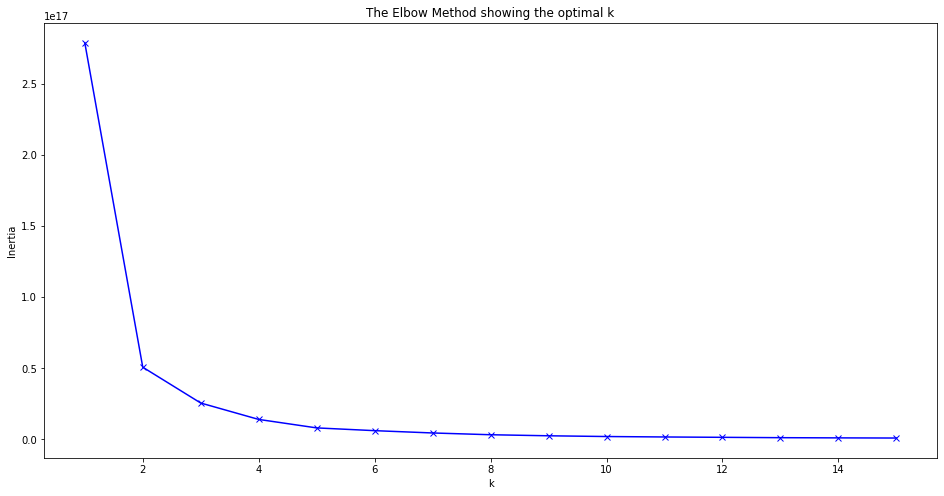

[2.788137284844551e+17, 5.072950846142712e+16, 2.5542870048151716e+16, 1.4017399559642116e+16, 8059988571668324.0, 6123571491985780.0, 4498585172284859.0, 3256037851133953.5, 2518954048647838.0, 1998780708975833.2, 1686061901919702.0, 1439452751573853.5, 1188132918866651.0, 1050628801708460.1, 940237537690256.5]


In [ ]:
distortions = []
K = range(1,16)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k, init = 'k-means++')
    kmeanModel.fit(customer[['num_tx','total_amount']]) # Ini yang diganti jadi df yang dipakai
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

## **Silhoutte Library**

In [ ]:
#import silhouette
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10, init = 'k-means++')
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

## **Silhoutte Analysis**

For n_clusters = 2 The average silhouette_score is : 0.8248324015928583
For n_clusters = 3 The average silhouette_score is : 0.7974152344507615
For n_clusters = 4 The average silhouette_score is : 0.7253256152914416
For n_clusters = 5 The average silhouette_score is : 0.7285151517627211
For n_clusters = 6 The average silhouette_score is : 0.7244303989739097


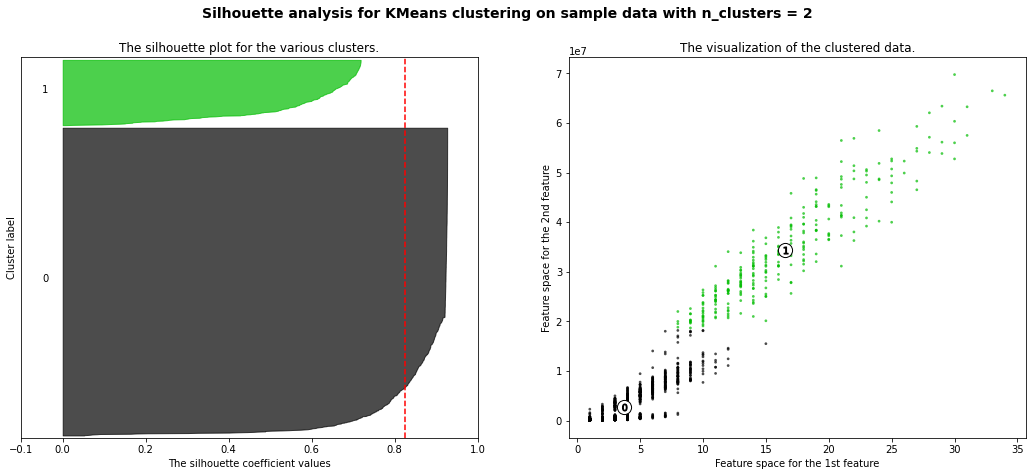

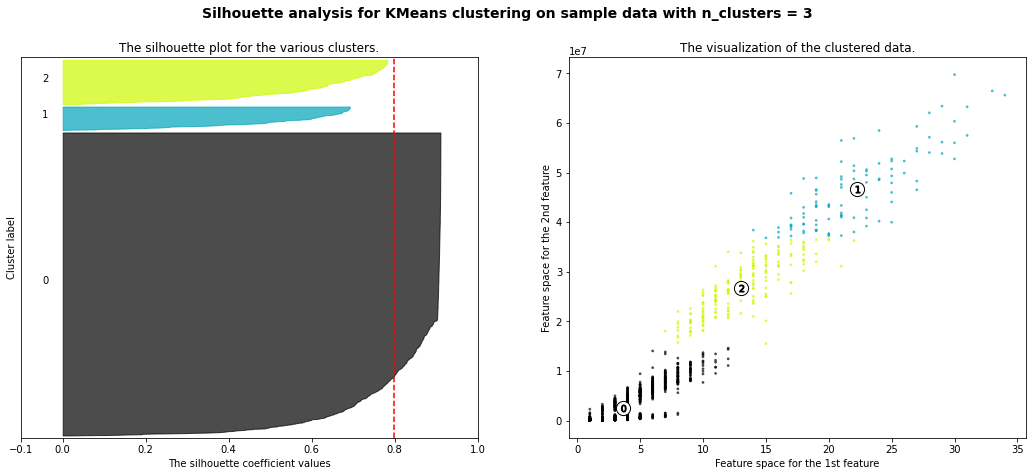

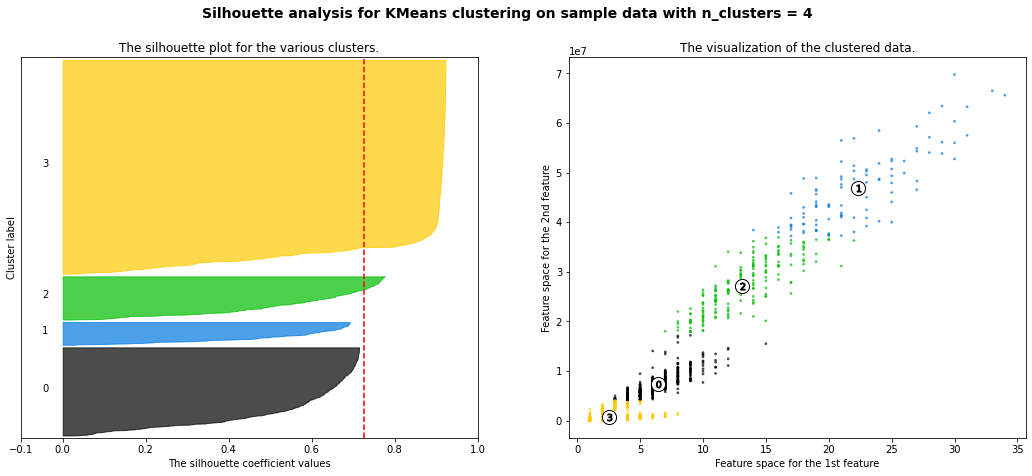

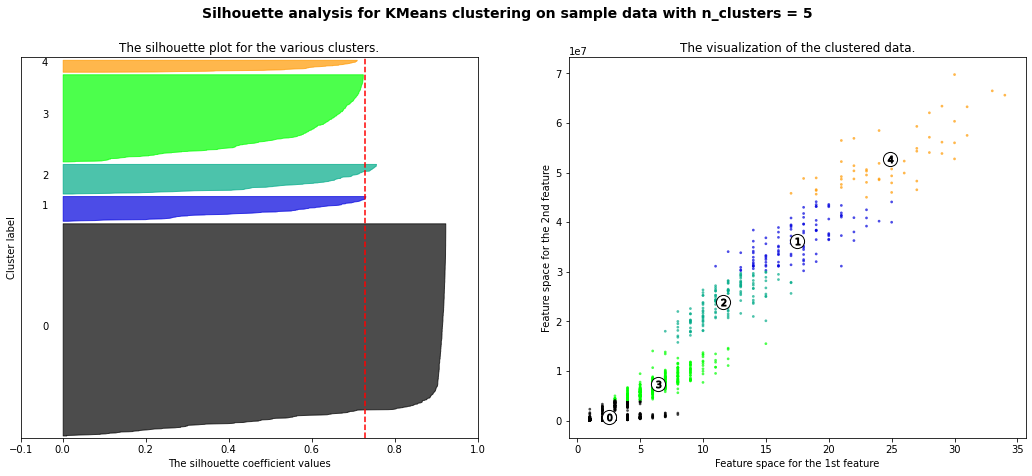

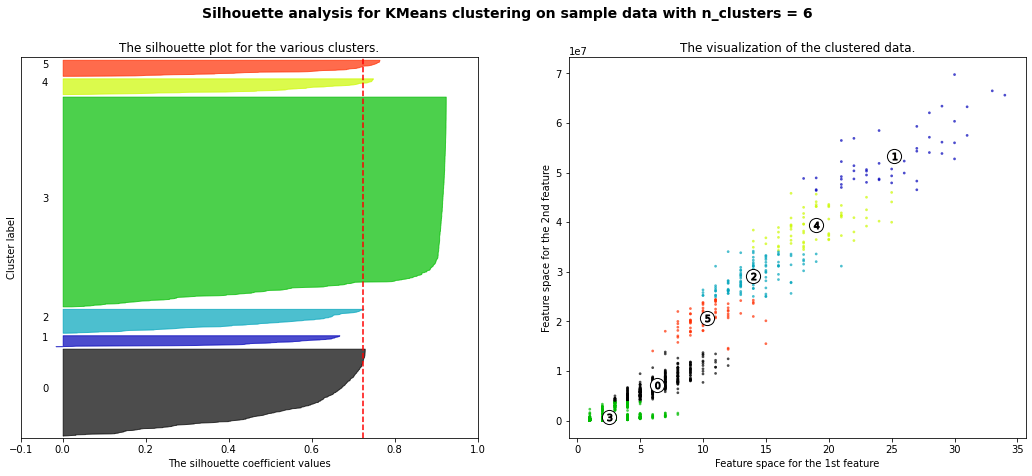

In [ ]:
silhoutte_analysis(customer[['num_tx','total_amount']],list(range(2,7)))

## **Cluster Result**

From K-Means and Silhoutte Scores we get that there are 3 clusters

In [ ]:
cluster_result = customer.copy()
cluster_model = KMeans(n_clusters= 3, init = 'k-means++')
cluster_model.fit_predict(cluster_result)
cluster_label = cluster_model.labels_
cluster_result['cluster'] = cluster_label

In [ ]:
cluster_result

,user_id,num_tx,total_amount,cluster
0,10000,1,95000,1
1,10001,3,410000,1
2,10002,4,780000,1
3,10003,1,115000,1
4,10004,2,505000,1
...,...,...,...,...
1569,20988,18,35788400,0
1570,20989,11,21702000,0
1571,20990,13,28158000,0
1572,20997,10,23822000,0


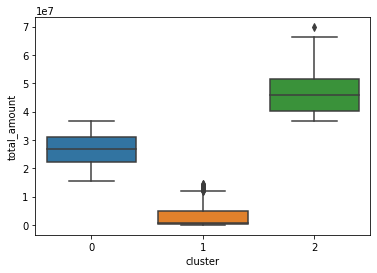

In [ ]:
sns.boxplot(data = cluster_result, x = 'cluster', y = 'total_amount')

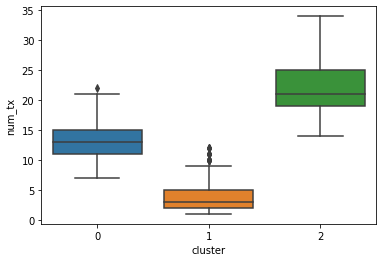

In [ ]:
sns.boxplot(data = cluster_result, x = 'cluster', y = 'num_tx')

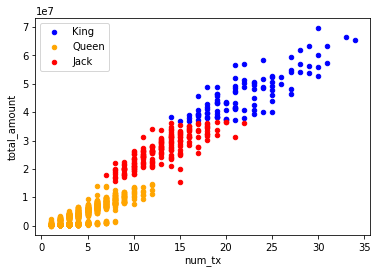

In [ ]:
ax = cluster_result[cluster_result['cluster'] == 2].plot.scatter(x='num_tx', y='total_amount', c='blue', label='King')
ax = cluster_result[cluster_result['cluster'] == 1].plot.scatter(x='num_tx', y='total_amount', c='orange', label='Queen', ax=ax)
ax = cluster_result[cluster_result['cluster'] == 0].plot.scatter(x='num_tx', y='total_amount', c='red', label='Jack', ax=ax)
ax

In [ ]:
cluster_descstat = pd.DataFrame(cluster_result.groupby(['cluster'])['num_tx','total_amount'].agg(['count','min','max','mean','median']))
cluster_descstat = round(cluster_descstat,3)
cluster_descstat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


num_tx                       total_amount                      \
         count min max   mean median        count       min       max   
cluster                                                                 
0          188   7  22 13.011   13.0          188  15500000  36564400   
1         1286   1  12  3.665    3.0         1286     15000  14595000   
2          100  14  34  22.22   21.0          100  36841000  69754600   

                                     
                  mean       median  
cluster                              
0       26,794,567.021 26,637,200.0  
1         2,634,341.68    640,000.0  
2         46,729,960.0 45,733,000.0

# **Cluster Breakdoown**

In [ ]:
# create new dataframe where we merge 'cluster' into df_user
user_cluster = cluster_result[['user_id','cluster']]
cluster_user = pd.merge(df_user, user_cluster, on = 'user_id', how = 'inner')
cluster_user

,user_id,register_date,name,gender,province,city,cluster
0,10000,2020-01-16,Warta Pradipta,male,DKI Jakarta,Jakarta Utara,1
1,10001,2018-03-10,Jaya Mahendra S.Ked,male,Jawa Timur,Surabaya,1
2,10002,2018-07-06,Balidin Sitorus,male,DKI Jakarta,Jakarta Selatan,1
3,10003,2018-11-19,Cemani Narpati,male,Banten,Tangerang Selatan,1
4,10004,2021-03-19,Daniswara Tarihoran S.Sos,male,Jawa Tengah,Semarang,1
...,...,...,...,...,...,...,...
1569,20988,2020-11-04,Shania Syahrini Novitasari S.Ked,female,DKI Jakarta,Jakarta Utara,0
1570,20989,2020-05-18,Kania Nuraini M.Farm,female,Jawa Barat,Kota Bogor,0
1571,20990,2018-05-02,Eka Safina Suartini,female,DKI Jakarta,Jakarta Selatan,0
1572,20997,2021-05-09,Tira Genta Oktaviani,female,Jawa Timur,Surabaya,0


## **Gender Distribution**

In [ ]:
# create df to see total user per cluster
user_distribution = cluster_user.groupby('cluster')['user_id'].nunique().reset_index()
user_distribution.columns = ['cluster','total_user']

#create df to find total user per cluster-gender
cluster_gender = cluster_user.groupby(['cluster','gender'])['user_id'].nunique().reset_index()
cluster_gender = pd.merge(cluster_gender, user_distribution, how = 'inner', on = 'cluster')

#create percentage to see the distribution
cluster_gender['percentage'] = cluster_gender['user_id']/cluster_gender['total_user']*100
cluster_gender = round(cluster_gender,2)
cluster_gender.sort_values(by = ['cluster','percentage'], ascending = False)

,cluster,gender,user_id,total_user,percentage
4,2,female,76,100,76.0
5,2,male,24,100,24.0
2,1,female,774,1286,60.19
3,1,male,512,1286,39.81
1,0,male,110,188,58.51
0,0,female,78,188,41.49


## **Customer Location**

In [ ]:
# create new dataframe that show number of user in each province - city
location = cluster_user.groupby(['cluster','province','city'])['user_id'].count().reset_index()

# combine it with total_user to get the percentage
location = pd.merge(location, user_distribution, how = 'inner', on = 'cluster' )
location['percentage'] = location['user_id']/location['total_user']*100
location = round(location,2)

# sort the data based on cluster and its percentage
location.sort_values(by = ['cluster','percentage'], ascending = False)

,cluster,province,city,user_id,total_user,percentage
29,2,DKI Jakarta,Jakarta Pusat,15,100,15.0
30,2,DKI Jakarta,Jakarta Selatan,12,100,12.0
36,2,Jawa Barat,Kota Depok,12,100,12.0
38,2,Jawa Timur,Surabaya,11,100,11.0
37,2,Jawa Tengah,Semarang,10,100,10.0
33,2,Jawa Barat,Bandung,8,100,8.0
27,2,Banten,Tangerang Selatan,7,100,7.0
32,2,DKI Jakarta,Jakarta Utara,6,100,6.0
28,2,DKI Jakarta,Jakarta Barat,5,100,5.0
31,2,DKI Jakarta,Jakarta Timur,4,100,4.0


## **Payment Method Distribution**

In [ ]:
# merge 'cluster' label into our main dataframe
user_cluster = cluster_result[['user_id','cluster']]
cluster_transaction = pd.merge(df, user_cluster, on = 'user_id', how = 'inner')

In [ ]:
# to get the total transaction number per cluster
tx_dist = cluster_transaction.groupby('cluster')['transaction_id'].nunique().reset_index()
tx_dist.columns = ['cluster','total_tx']

# to get the total transaction based on cluster-payment method
pm_dist = cluster_transaction.groupby(['cluster','payment_method'])['transaction_id'].nunique().reset_index()

# merge the data
pm_dist = pd.merge(pm_dist,tx_dist, on = 'cluster',how = 'inner')
pm_dist['percentage'] = pm_dist['transaction_id']/pm_dist['total_tx']*100
pm_dist = round(pm_dist,2)
pm_dist.sort_values(by = ['cluster','percentage'], ascending = False)

,cluster,payment_method,transaction_id,total_tx,percentage
13,2,paylater,746,2222,33.57
12,2,e-wallet,538,2222,24.21
14,2,transfer,424,2222,19.08
11,2,debit card,358,2222,16.11
10,2,credit card,156,2222,7.02
8,1,paylater,1624,4713,34.46
7,1,e-wallet,1050,4713,22.28
9,1,transfer,975,4713,20.69
6,1,debit card,745,4713,15.81
5,1,credit card,319,4713,6.77


# **[Cluster Characteristics & Recommendations](https://docs.google.com/presentation/d/11NjvRE7RIhkcpBirc8XMuZzePYZGPE8oWy0gGdBnTBc/edit?usp=sharing)**

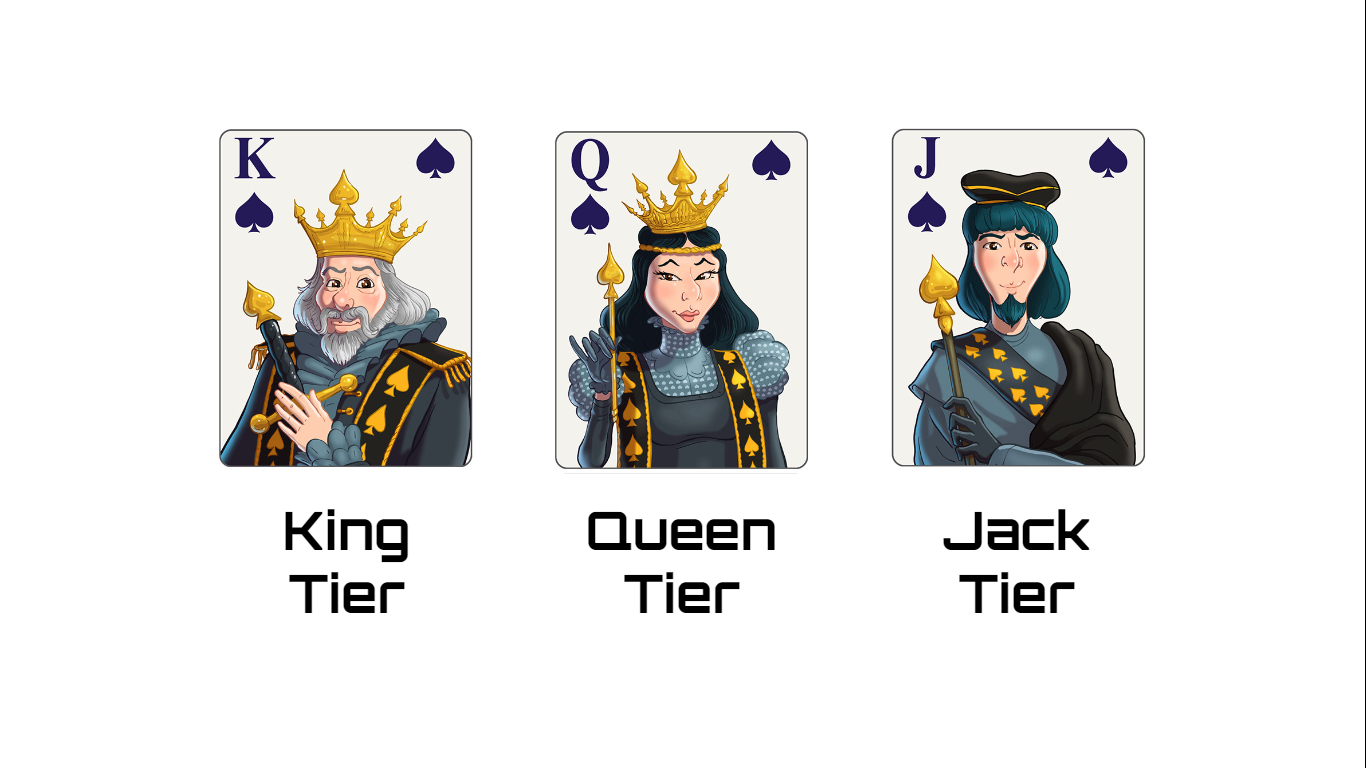

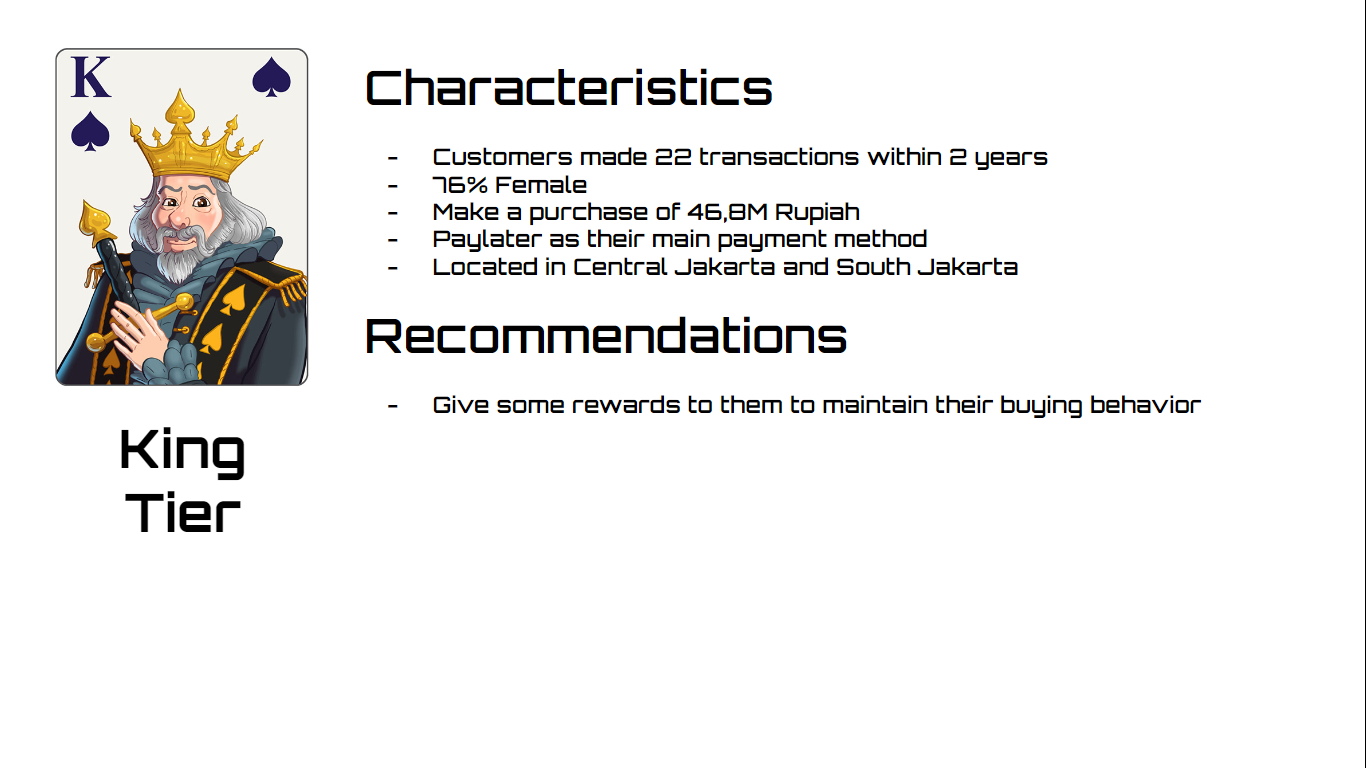

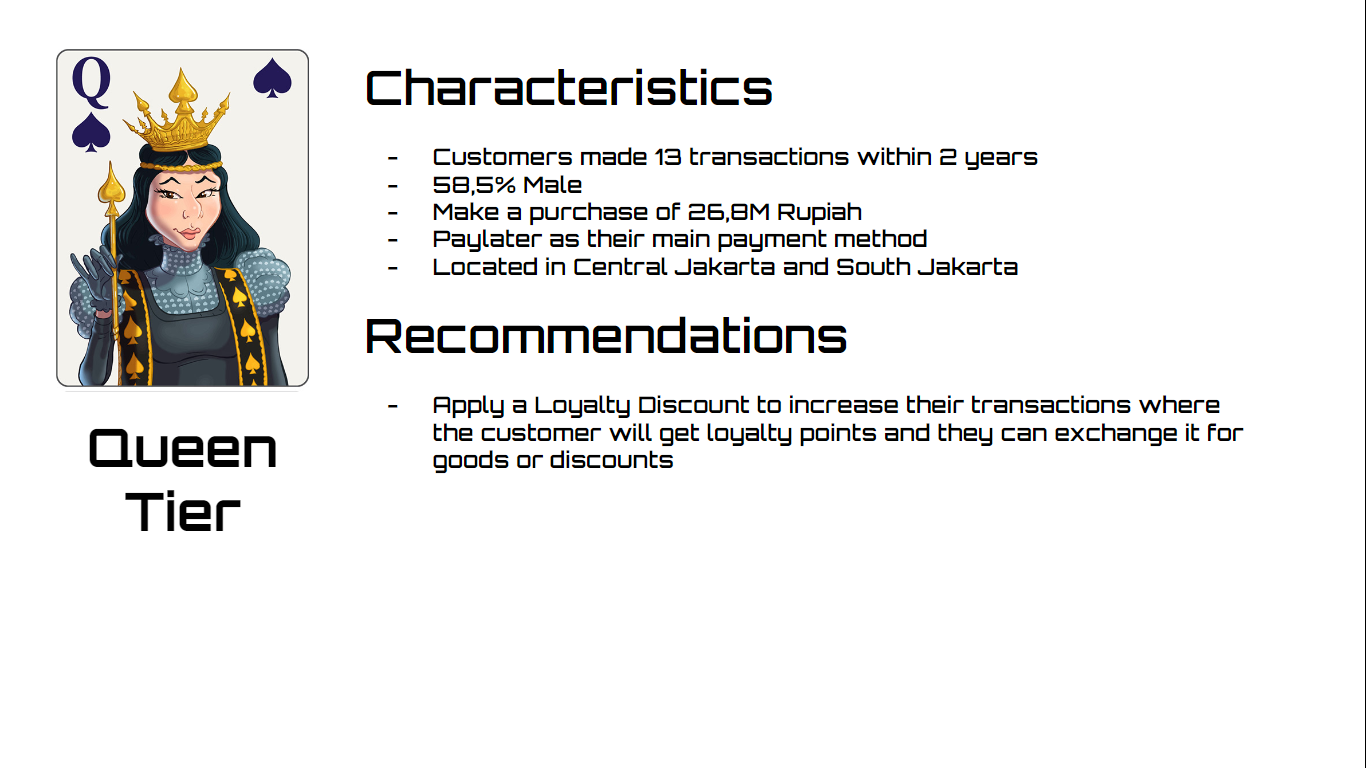

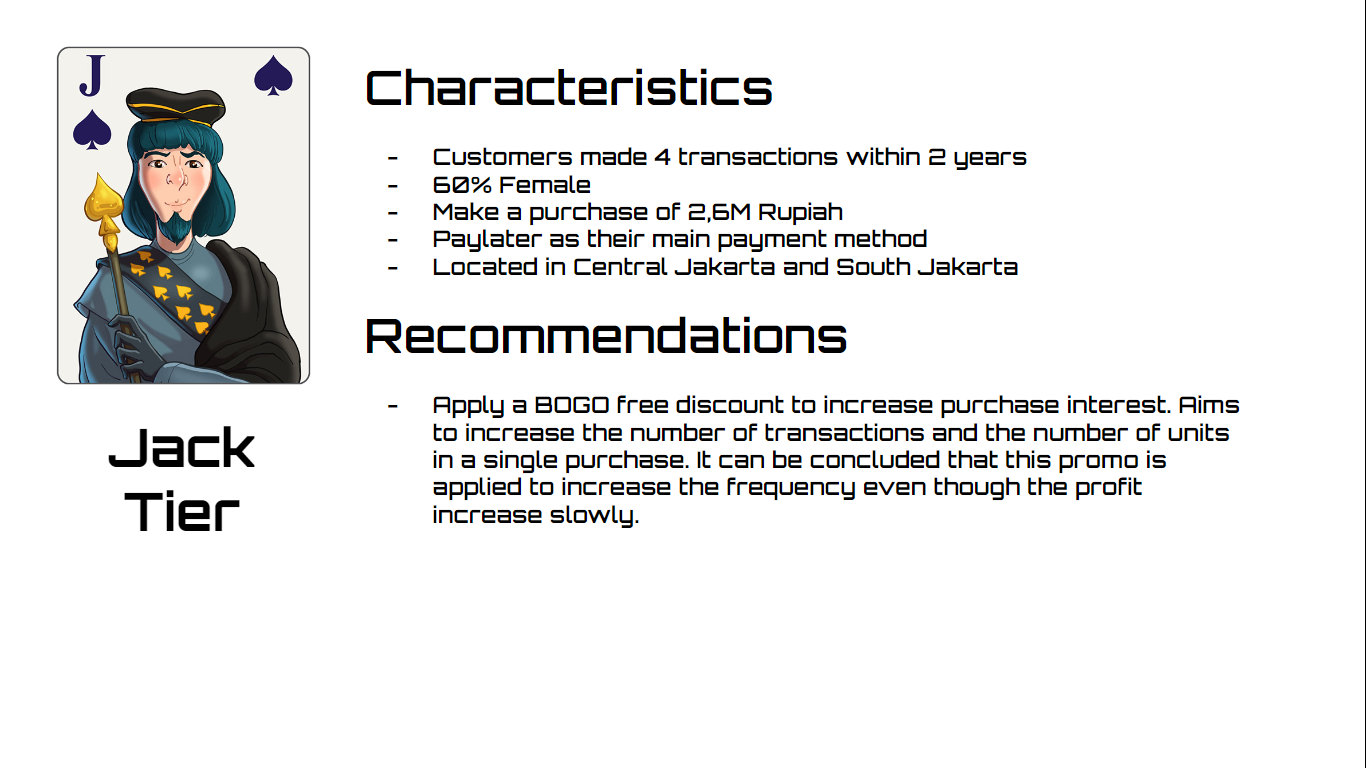